### User-movie graph

C:\Users\ntuke\AppData\Local\Temp\ipykernel_34052\3084880625.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


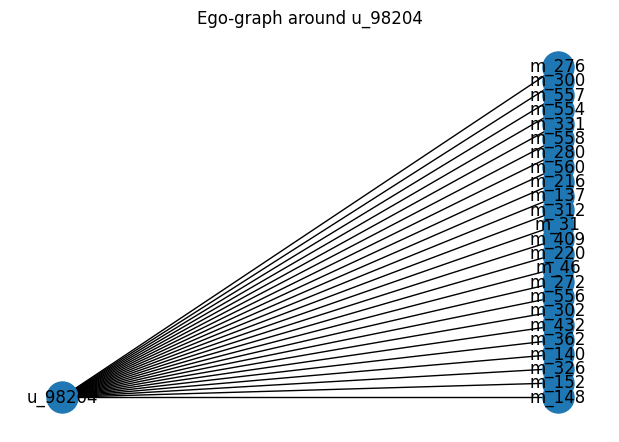

In [14]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

edges = pd.read_csv("D:/COmparative_Study_of_Multimodal_Represenations/data/processed/movielens/edge_list.csv")
G = nx.Graph()
# user and movie nodes
for _, row in edges.iterrows():
    u = f"u_{row['user_idx']}"
    m = f"m_{row['movie_idx']}"
    G.add_node(u, bipartite='user')
    G.add_node(m, bipartite='movie')
    G.add_edge(u, m)

center_user = "u_98204"  
ego = nx.ego_graph(G, center_user, radius=1)  # user and its movies

pos = {}
users = [n for n, d in ego.nodes(data=True) if n.startswith("u_")]
movies = [n for n in ego.nodes() if n.startswith("m_")]

for i, u in enumerate(users):
    pos[u] = (0, i)
for j, m in enumerate(movies):
    pos[m] = (1, j)

plt.figure(figsize=(6, 4))
nx.draw(
    ego, pos,
    with_labels=True,
    node_size=500,
)
plt.title(f"Ego-graph around {center_user}")
plt.tight_layout()
plt.show()

### Movie similarity graph

In [10]:
sim = pd.read_csv("D:/COmparative_Study_of_Multimodal_Represenations/data/processed/movielens/movie_similarity_edges.csv")
sim.columns

Index(['movie_idx_1', 'movie_idx_2', 'similarity'], dtype='object')

C:\Users\ntuke\AppData\Local\Temp\ipykernel_20344\2087949030.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


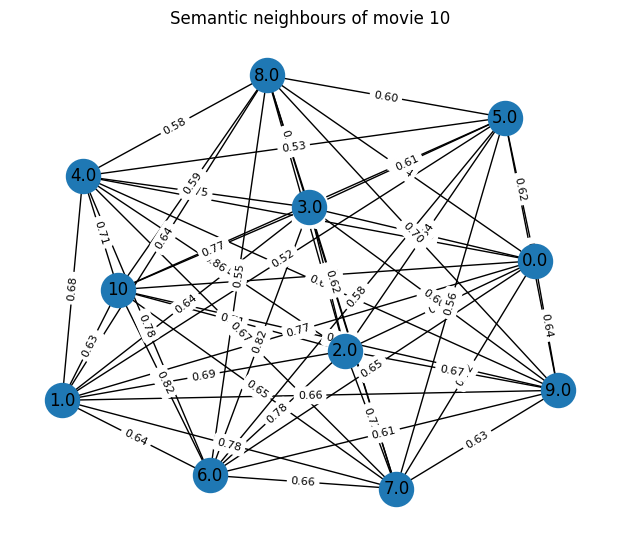

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


#  weighted graph
Gm = nx.Graph()
for _, row in sim.iterrows():
    i = row['movie_idx_1']
    j = row['movie_idx_2']
    s = row['similarity']
    Gm.add_edge(i, j, weight=s)

center_movie = 10  # example movie_idx
neighbors = list(Gm.neighbors(center_movie))[:10]  # up to 10 neighbors

sub_nodes = [center_movie] + neighbors
subG = Gm.subgraph(sub_nodes)

# subgraph with edge labels = similarity
pos = nx.spring_layout(subG) 

plt.figure(figsize=(6, 5))
nx.draw(
    subG, pos,
    with_labels=True,
    node_size=600,
)
edge_labels = nx.get_edge_attributes(subG, 'weight')
edge_labels = {k: f"{v:.2f}" for k, v in edge_labels.items()}
nx.draw_networkx_edge_labels(subG, pos, edge_labels=edge_labels, font_size=8)

plt.title(f"Semantic neighbours of movie {center_movie}")
plt.tight_layout()
plt.show()


In [ ]:
# output center movie, its neighbours and similarity scores

rows = []
for n in neighbors:  # neighbours of center_movie
    sim_score = Gm[center_movie][n]["weight"]
    rows.append({"center_movie_idx": center_movie,
                 "neighbor_idx": n,
                 "similarity": sim_score})

neigh_df = pd.DataFrame(rows).sort_values("similarity", ascending=False)

print("Semantic neighbours of movie", center_movie)
print(neigh_df.to_string(index=False))


Semantic neighbours of movie 10
 center_movie_idx  neighbor_idx  similarity
               10           6.0    0.816951
               10           3.0    0.772462
               10           4.0    0.713182
               10           2.0    0.711234
               10           0.0    0.673068
               10           7.0    0.652057
               10           9.0    0.642732
               10           1.0    0.634128
               10           5.0    0.594070
               10           8.0    0.592780


In [ ]:
neigh_with_titles = (
    neigh_df
    .merge(
        movies[["movie_idx", "title"]],
        left_on="center_movie_idx",
        right_on="movie_idx",
        how="left"
    )
    .rename(columns={"title": "center_title"})
    .drop(columns=["movie_idx"])
    .merge(
        movies[["movie_idx", "title"]],
        left_on="neighbor_idx",
        right_on="movie_idx",
        how="left"
    )
    .rename(columns={"title": "neighbor_title"})
    .drop(columns=["movie_idx"])
)

neigh_with_titles = neigh_with_titles[
    ["center_movie_idx", "center_title",
     "neighbor_idx", "neighbor_title",
     "similarity"]
]

print(neigh_with_titles.to_string(index=False))


 center_movie_idx                   center_title  neighbor_idx                     neighbor_title  similarity
               10 American President, The (1995)           6.0                     Sabrina (1995)    0.816951
               10 American President, The (1995)           3.0           Waiting to Exhale (1995)    0.772462
               10 American President, The (1995)           4.0 Father of the Bride Part II (1995)    0.713182
               10 American President, The (1995)           2.0            Grumpier Old Men (1995)    0.711234
               10 American President, The (1995)           0.0                   Toy Story (1995)    0.673068
               10 American President, The (1995)           7.0                Tom and Huck (1995)    0.652057
               10 American President, The (1995)           9.0                   GoldenEye (1995)    0.642732
               10 American President, The (1995)           1.0                     Jumanji (1995)    0.634128
          

In [ ]:
neigh_with_titles = (
    neigh_df
    .merge(
        movies[["movie_idx", "title", "genres"]],
        left_on="center_movie_idx",
        right_on="movie_idx",
        how="left"
    )
    .rename(columns={"title": "center_title", "genres": "center_genres"})
    .drop(columns=["movie_idx"])
    .merge(
        movies[["movie_idx", "title", "genres"]],
        left_on="neighbor_idx",
        right_on="movie_idx",
        how="left"
    )
    .rename(columns={"title": "neighbor_title", "genres": "neighbor_genres"})
    .drop(columns=["movie_idx"])
)

neigh_with_titles = neigh_with_titles[
    [
        "center_movie_idx", "center_title", "center_genres",
        "neighbor_idx", "neighbor_title", "neighbor_genres",
        "similarity"
    ]
]

print(neigh_with_titles.to_string(index=False))


 center_movie_idx                   center_title        center_genres  neighbor_idx                     neighbor_title                             neighbor_genres  similarity
               10 American President, The (1995) Comedy|Drama|Romance           6.0                     Sabrina (1995)                              Comedy|Romance    0.816951
               10 American President, The (1995) Comedy|Drama|Romance           3.0           Waiting to Exhale (1995)                        Comedy|Drama|Romance    0.772462
               10 American President, The (1995) Comedy|Drama|Romance           4.0 Father of the Bride Part II (1995)                                      Comedy    0.713182
               10 American President, The (1995) Comedy|Drama|Romance           2.0            Grumpier Old Men (1995)                              Comedy|Romance    0.711234
               10 American President, The (1995) Comedy|Drama|Romance           0.0                   Toy Story (1995) Advent

In [20]:
neigh_with_titles[['center_title', 'center_genres', 'neighbor_title', 'neighbor_genres', 'similarity']]

,center_title,center_genres,neighbor_title,neighbor_genres,similarity
0,"American President, The (1995)",Comedy|Drama|Romance,Sabrina (1995),Comedy|Romance,0.816951
1,"American President, The (1995)",Comedy|Drama|Romance,Waiting to Exhale (1995),Comedy|Drama|Romance,0.772462
2,"American President, The (1995)",Comedy|Drama|Romance,Father of the Bride Part II (1995),Comedy,0.713182
3,"American President, The (1995)",Comedy|Drama|Romance,Grumpier Old Men (1995),Comedy|Romance,0.711234
4,"American President, The (1995)",Comedy|Drama|Romance,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0.673068
5,"American President, The (1995)",Comedy|Drama|Romance,Tom and Huck (1995),Adventure|Children,0.652057
6,"American President, The (1995)",Comedy|Drama|Romance,GoldenEye (1995),Action|Adventure|Thriller,0.642732
7,"American President, The (1995)",Comedy|Drama|Romance,Jumanji (1995),Adventure|Children|Fantasy,0.634128
8,"American President, The (1995)",Comedy|Drama|Romance,Heat (1995),Action|Crime|Thriller,0.594070
9,"American President, The (1995)",Comedy|Drama|Romance,Sudden Death (1995),Action,0.592780


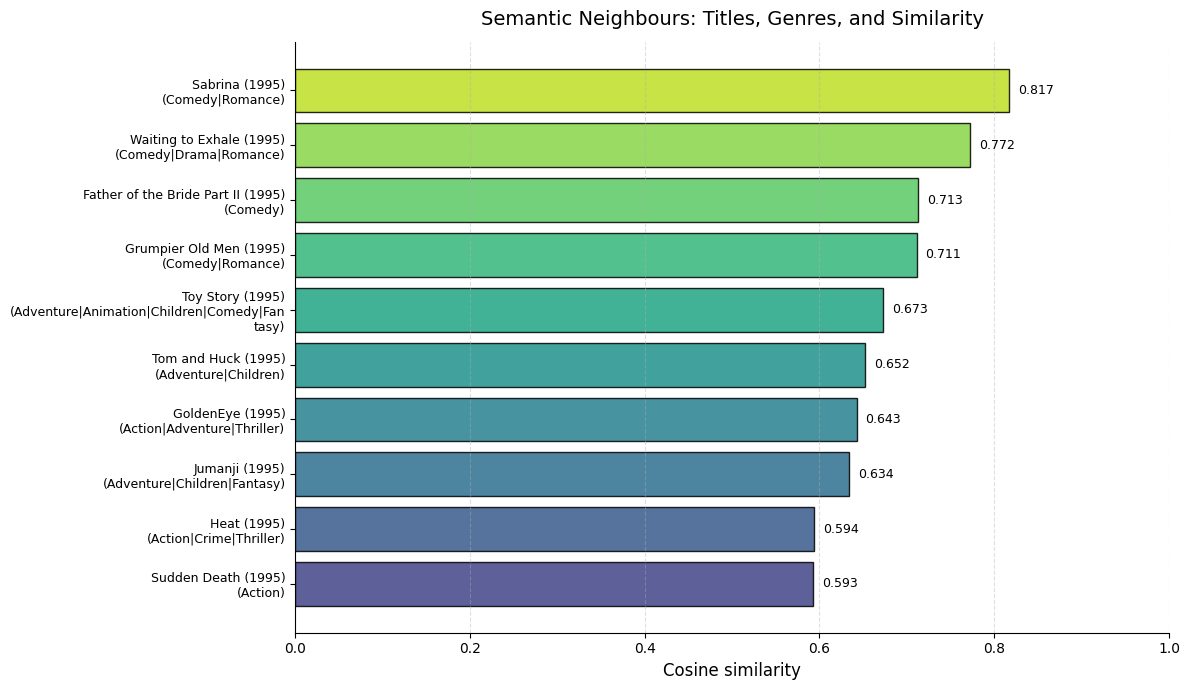

In [ ]:
import matplotlib.pyplot as plt
import textwrap
import numpy as np

plot_df = neigh_with_titles.sort_values("similarity", ascending=True).copy()

TOP_K = 10
plot_df = plot_df.tail(TOP_K)

def make_label(row, width=40):
    title = "\n".join(textwrap.wrap(row["neighbor_title"], width=width))
    genres = "(" + row["neighbor_genres"] + ")"
    genres_wrapped = "\n".join(textwrap.wrap(genres, width=width))
    return f"{title}\n{genres_wrapped}"

plot_df["label"] = plot_df.apply(make_label, axis=1)

colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(plot_df)))

fig, ax = plt.subplots(figsize=(12, 7))

y_positions = np.arange(len(plot_df))

bars = ax.barh(
    y_positions,
    plot_df["similarity"],
    color=colors,
    edgecolor="black",
    alpha=0.85,
)

ax.set_yticks(y_positions)
ax.set_yticklabels(plot_df["label"], fontsize=9)

ax.set_xlabel("Cosine similarity", fontsize=12)
ax.set_xlim(0, 1.0)

ax.set_title("Semantic Neighbours: Titles, Genres, and Similarity", fontsize=14, pad=12)

for bar, sim_val in zip(bars, plot_df["similarity"]):
    ax.text(
        bar.get_width() + 0.01,
        bar.get_y() + bar.get_height()/2,
        f"{sim_val:.3f}",
        va="center",
        fontsize=9,
        color="black",
    )

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(axis="x", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()

### Sample from dataset

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from pathlib import Path

BASE = Path("D:/COmparative_Study_of_Multimodal_Represenations/data/processed/movielens")

TARGET_TITLE = "Toy Story (1995)"   # example title
TARGET_MOVIE_IDX = None            

TOP_K_ALSO_VIEWED = 10
TOP_K_SIMILAR = 5

In [ ]:
# ratings
dfs = []
for split in ["train", "val", "test"]:
    path = BASE / f"{split}.csv"
    if path.exists():
        dfs.append(pd.read_csv(path))

if not dfs:
    raise RuntimeError("No train/val/test CSV files found.")

all_ratings = pd.concat(dfs, ignore_index=True)

In [ ]:
# movie table: one row per movie_idx
movie_cols = [c for c in ["movie_idx", "movieId", "title", "genres", "tag"] if c in all_ratings.columns]
movies = (
    all_ratings[movie_cols]
    .dropna(subset=["movie_idx", "title"])
    .drop_duplicates(subset=["movie_idx"])
    .reset_index(drop=True)
)

In [ ]:
# user–movie edges and movie–movie similarity edges
edges = pd.read_csv(BASE / "edge_list.csv")                # user_idx, movie_idx
sim_edges = pd.read_csv(BASE / "movie_similarity_edges.csv")  # movie_idx_1, movie_idx_2, similarity


In [ ]:
# target movie
def select_target_movie():
    global TARGET_TITLE, TARGET_MOVIE_IDX
    if TARGET_MOVIE_IDX is not None:
        tgt = movies[movies["movie_idx"] == TARGET_MOVIE_IDX]
    else:
        tgt = movies[movies["title"] == TARGET_TITLE]

    if tgt.empty:
        raise ValueError("Target movie not found. Check TARGET_TITLE or TARGET_MOVIE_IDX.")
    return tgt.iloc[0]


In [ ]:
target = select_target_movie()
target_idx = int(target["movie_idx"])
target_title = target["title"]
target_genres = target.get("genres", "")
target_tags = target.get("tag", "")

print(f"TARGET MOVIE")
print(f"movie_idx: {target_idx}")
print(f"Title    : {target_title}")
print(f"Genres   : {target_genres}")
print(f"Tags/overview (truncated): {target_tags[:250]}{'...' if isinstance(target_tags, str) and len(target_tags) > 250 else ''}")
print()


# user-movie graph: also viewed
print(f"ALSO VIEWED (user–movie graph, top {TOP_K_ALSO_VIEWED})")

# users who watched example movie
users_for_target = edges[edges["movie_idx"] == target_idx]["user_idx"].unique()

# all movies watched by those users (excluding the target)
co_edges = edges[edges["user_idx"].isin(users_for_target)]
co_movies = co_edges["movie_idx"].values
co_movies = co_movies[co_movies != target_idx]

if len(co_movies) == 0:
    print("No co-view data for this movie.")
else:
    counts = Counter(co_movies)
    also_df = (
        pd.DataFrame({"movie_idx": list(counts.keys()), "co_count": list(counts.values())})
        .sort_values("co_count", ascending=False)
        .head(TOP_K_ALSO_VIEWED)
        .merge(movies[["movie_idx", "title"]], on="movie_idx", how="left")
    )
    print(also_df[["movie_idx", "title", "co_count"]].to_string(index=False))

print()


# genome similarity graph: similar movies
print(f"SEMANTICALLY SIMILAR MOVIES (genome, top {TOP_K_SIMILAR})")

sim_df = sim_edges[
    (sim_edges["movie_idx_1"] == target_idx) |
    (sim_edges["movie_idx_2"] == target_idx)
].copy()

if sim_df.empty:
    print("No similarity edges found for this movie.")
else:
    sim_df["neighbor_idx"] = np.where(
        sim_df["movie_idx_1"] == target_idx,
        sim_df["movie_idx_2"],
        sim_df["movie_idx_1"],
    )
    sim_df = (
        sim_df[["neighbor_idx", "similarity"]]
        .sort_values("similarity", ascending=False)
        .drop_duplicates(subset=["neighbor_idx"])
        .head(TOP_K_SIMILAR)
        .merge(movies[["movie_idx", "title"]], left_on="neighbor_idx",
               right_on="movie_idx", how="left")
    )
    print(sim_df[["neighbor_idx", "title", "similarity"]].to_string(index=False))


TARGET MOVIE
movie_idx: 0
Title    : Toy Story (1995)
Genres   : Adventure|Animation|Children|Comedy|Fantasy
Tags/overview (truncated): Watched computer animation Disney animated feature Pixar animation TÃ©a Leoni does not star in this movie Pixar animation family Tom Hanks Pixar witty Pixar adventure animated animation clever comedy computer animation family fantasy Tom Hanks bright...

ALSO VIEWED (user–movie graph, top 10) 
 movie_idx                                             title  co_count
       338                               Forrest Gump (1994)     32444
       245         Star Wars: Episode IV - A New Hope (1977)     31121
       280                               Pulp Fiction (1994)     30785
       455                              Jurassic Park (1993)     30054
       700              Independence Day (a.k.a. ID4) (1996)     29501
       558                  Silence of the Lambs, The (1991)     28897
       302                  Shawshank Redemption, The (1994)     28583
 

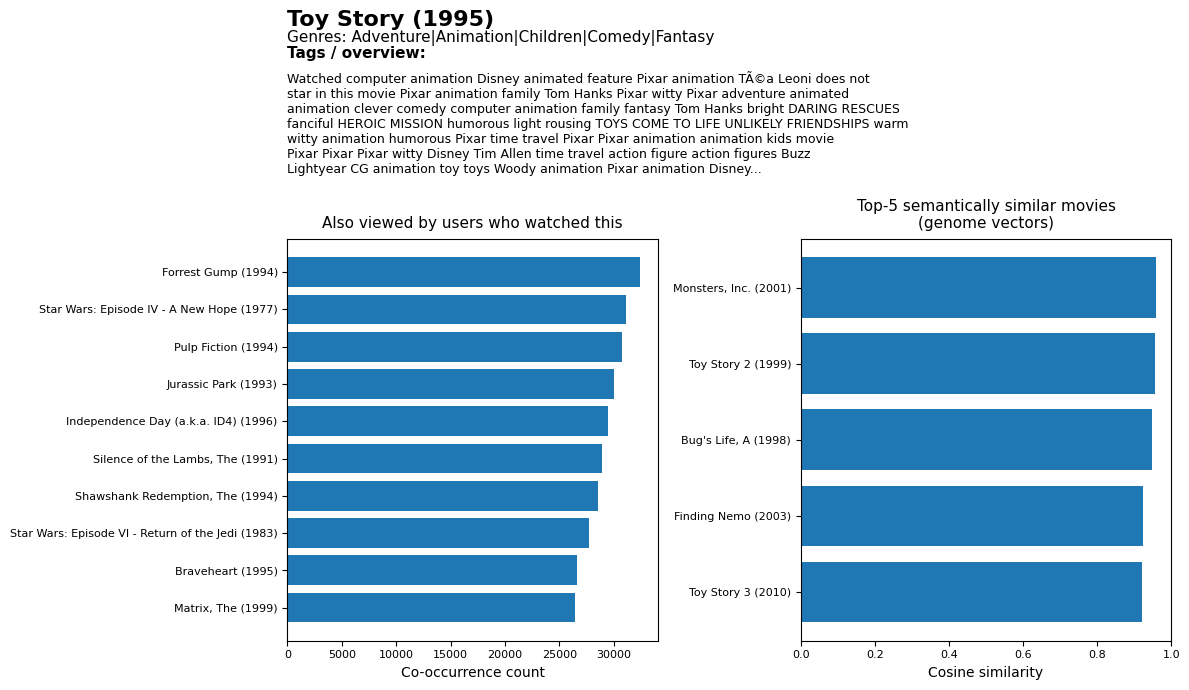

In [ ]:
import matplotlib.pyplot as plt
import textwrap

tag_text = target_tags if isinstance(target_tags, str) else ""
wrapped_tags = textwrap.fill(tag_text, width=90)
if len(wrapped_tags) > 600:
    wrapped_tags = wrapped_tags[:600] + "..."

fig = plt.figure(figsize=(12, 7))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 3])

ax_info = fig.add_subplot(gs[0, :])
ax_info.axis("off")

y = 1.0
line_h = 0.12

ax_info.text(0.0, y, target_title,
             fontsize=16, weight="bold", transform=ax_info.transAxes)
y -= line_h

ax_info.text(0.0, y, f"Genres: {target_genres}",
             fontsize=11, transform=ax_info.transAxes)
y -= line_h

ax_info.text(0.0, y, "Tags / overview:",
             fontsize=11, weight="bold", transform=ax_info.transAxes)
y -= line_h * 0.8

ax_info.text(0.0, y, wrapped_tags,
             fontsize=9, transform=ax_info.transAxes, va="top")

ax_info.set_title("", fontsize=12, loc="left")

ax_also = fig.add_subplot(gs[1, 0])

if not also_df.empty:
    also_plot = also_df.head(10).iloc[::-1]  # reverse so most frequent is at top
    ax_also.barh(also_plot["title"], also_plot["co_count"])
    ax_also.set_xlabel("Co-occurrence count", fontsize=10)
    ax_also.set_title("Also viewed by users who watched this",
                      fontsize=11, pad=8)
    ax_also.tick_params(axis="y", labelsize=8)
    ax_also.tick_params(axis="x", labelsize=8)
else:
    ax_also.text(0.5, 0.5, "No co-view data",
                 ha="center", va="center", fontsize=10)
    ax_also.set_axis_off()

ax_sim = fig.add_subplot(gs[1, 1])

if not sim_df.empty:
    sim_plot = sim_df.head(5).iloc[::-1]
    ax_sim.barh(sim_plot["title"], sim_plot["similarity"])
    ax_sim.set_xlabel("Cosine similarity", fontsize=10)
    ax_sim.set_xlim(0, 1.0)
    ax_sim.set_title("Top-5 semantically similar movies\n(genome vectors)",
                     fontsize=11, pad=8)
    ax_sim.tick_params(axis="y", labelsize=8)
    ax_sim.tick_params(axis="x", labelsize=8)
else:
    ax_sim.text(0.5, 0.5, "No similarity edges",
                ha="center", va="center", fontsize=10)
    ax_sim.set_axis_off()

plt.tight_layout()
plt.show()
